In [1]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Завантаження попередньо підготовлених датасетів**

In [2]:
path_users = './data/Normalized_dataset_users.csv'
path_features = './data/Normalized_dataset_features.csv'

In [3]:
df_users = pd.read_csv(path_users, on_bad_lines='skip')
df_users.shape

(9711301, 4)

In [4]:
df_features = pd.read_csv(path_features, on_bad_lines='skip')
df_features.shape

(50683, 18)

# **Створення профілю вручну для одного користувача**

In [5]:
df_users.groupby(by='user_id').count().sort_values(by='track_id', ascending=False)

,track_id,playcount,playcount_norm
user_id,,,
ec6dfcf19485cb011e0b22637075037aae34cf26,784,784,784
4e11f45d732f4861772b2906f81a7d384552ad12,384,384,384
726da71c2c2ea119119a7957517fccd028d1be76,376,376,376
113255a012b2affeab62607563d03fbdf31b08e7,367,367,367
7adec7f006cb09482d36609d205293d8b61f030e,366,366,366
...,...,...,...
c736e87d6a5193662b776136067a7e104f970fbb,1,1,1
3d3750d24e0200ab74aee8f3a11f9c7778f22d4d,1,1,1
c737a8a65917262b5ff3289242f83929277554a1,1,1,1


In [6]:
user = '113255a012b2affeab62607563d03fbdf31b08e7'

In [7]:
user_taste = df_users[df_users['user_id'] == user]
user_taste.shape

(367, 4)

In [8]:
user_taste.sample(5)

,track_id,user_id,playcount,playcount_norm
2167543,TREVVNJ128EF359E1E,113255a012b2affeab62607563d03fbdf31b08e7,1,0.000000
2167760,TRZBZRH128F92FFBFC,113255a012b2affeab62607563d03fbdf31b08e7,7,0.002036
2167765,TRDYRIK128F9317174,113255a012b2affeab62607563d03fbdf31b08e7,3,0.000679
2167801,TRVVOMA128F426F646,113255a012b2affeab62607563d03fbdf31b08e7,20,0.006447
2167714,TRBNWKN128F425F18F,113255a012b2affeab62607563d03fbdf31b08e7,1,0.000000


In [9]:
user_taste_shape = user_taste.shape
for col in user_taste.columns:
  uniq = user_taste[col].nunique()
  print(f'{col:<15} {uniq:<10} {uniq / user_taste_shape[0] * 100:.4f}%')

track_id        367        100.0000%
user_id         1          0.2725%
playcount       24         6.5395%
playcount_norm  24         6.5395%


## **Склейка датасетів**

In [10]:
print(user_taste['track_id'].dtype)
print(df_features['track_id'].dtype)

object
object


In [11]:
df_user = pd.merge(user_taste, df_features, on='track_id', how='inner')
df_user.shape

(367, 21)

In [12]:
df_user.sample(5)

,track_id,user_id,playcount,playcount_norm,name,artist,spotify_id,year,duration_ms,danceability,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
15,TREAQSX128E07818CA,113255a012b2affeab62607563d03fbdf31b08e7,1,0.000000,One More Time (Romanthony's Unplugged),Daft Punk,6ju6DQ7uIuo74eh8iKUQu5,2003,220586,0.602,...,0.818182,0.732551,1,0.0559,0.915000,0.000775,0.2410,0.257,0.412658,0.8
231,TRBEAWD128F931B008,113255a012b2affeab62607563d03fbdf31b08e7,1,0.000000,Shrimp,Mr. Scruff,0wNBd544EiayIPwXzmjnSR,2004,421600,0.857,...,0.090909,0.848229,0,0.0620,0.103000,0.803000,0.0471,0.965,0.507800,0.8
175,TRATTGW128F427A82D,113255a012b2affeab62607563d03fbdf31b08e7,2,0.000339,Red Socks Pugie,Foals,05V8hCbVHIEvsAc8XjOA5T,2008,315253,0.539,...,0.181818,0.836790,0,0.0490,0.145000,0.000687,0.0879,0.381,0.657100,0.8
171,TRJPFPE128F429EB46,113255a012b2affeab62607563d03fbdf31b08e7,1,0.000000,Twin Cinema,The New Pornographers,4rJaBIRZFEbIoqYzPRyONV,2005,179186,0.570,...,0.181818,0.889585,1,0.0481,0.087300,0.000420,0.0172,0.637,0.540103,0.8
237,TRZYWCD128F425C7FD,113255a012b2affeab62607563d03fbdf31b08e7,1,0.000000,Technologic (Peaches No Logic Remix),Daft Punk,6Wn1bfoqAXHqzjoNSzpiKs,2006,280413,0.897,...,0.090909,0.819773,1,0.0801,0.000682,0.015000,0.3020,0.762,0.569242,0.8


In [13]:
user_shape = df_user.shape
for col in df_user.columns:
  uniq = df_user[col].nunique()
  print(f'{col:<15} {uniq:<10} {uniq / user_shape[0] * 100:.4f}%')

track_id        367        100.0000%
user_id         1          0.2725%
playcount       24         6.5395%
playcount_norm  24         6.5395%
name            367        100.0000%
artist          113        30.7902%
spotify_id      367        100.0000%
year            30         8.1744%
duration_ms     361        98.3651%
danceability    285        77.6567%
energy          294        80.1090%
key             12         3.2698%
loudness        366        99.7275%
mode            2          0.5450%
speechiness     279        76.0218%
acousticness    343        93.4605%
instrumentalness 309        84.1962%
liveness        258        70.2997%
valence         315        85.8311%
tempo           366        99.7275%
time_signature  4          1.0899%


In [14]:
user_features = ['playcount', 'playcount_norm', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature']

## **Створення профілю з НЕнормалізованою кількістю прослуховувань**

In [15]:
user_data = df_user[user_features]
user_data.head()

,playcount,playcount_norm,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,10,0.003054,0.610,0.807,0.454545,0.864256,1,0.0305,0.0769,0.000003,0.3760,0.689,0.468955,0.8
1,2,0.000339,0.596,0.394,0.181818,0.779658,1,0.0396,0.2700,0.002460,0.1360,0.486,0.503723,0.8
2,1,0.000000,0.161,0.385,0.000000,0.781104,1,0.0322,0.9870,0.833000,0.1260,0.193,0.658750,0.6
3,1,0.000000,0.709,0.615,0.818182,0.834040,0,0.0272,0.1150,0.000006,0.0634,0.602,0.482032,0.8
4,2,0.000339,0.197,0.301,0.000000,0.872097,0,0.0307,0.9220,0.712000,0.0700,0.105,0.429498,0.6


In [16]:
user_profile = pd.Series()
for col in user_features[2:]:
  user_profile[col] = np.sum(user_data[col] * user_data['playcount']) / np.sum(user_data['playcount'])

In [17]:
user_profile

danceability        0.575579
energy              0.654765
key                 0.474007
loudness            0.807341
mode                0.588710
speechiness         0.066077
acousticness        0.277145
instrumentalness    0.350739
liveness            0.197271
valence             0.483227
tempo               0.508612
time_signature      0.790176
dtype: float64

## **Створення профілю з нормалізованою кількістю прослуховувань**

In [18]:
user_profile_norm = pd.Series()
for col in user_features[2:]:
  user_profile_norm[col] = np.sum(user_data[col] * user_data['playcount_norm']) / np.sum(user_data['playcount_norm'])

In [19]:
user_profile_norm

danceability        0.587559
energy              0.654415
key                 0.464484
loudness            0.807444
mode                0.584754
speechiness         0.066313
acousticness        0.284555
instrumentalness    0.354082
liveness            0.194288
valence             0.496380
tempo               0.505953
time_signature      0.794183
dtype: float64

Порівнявши два отримані профілі користувача можна зробити висновок, що майже нема різниці який підхід використовувати для його обрахування, оскільки значення майже однакові. Всі дані знаходять в проміжку від 0 до 1.

# **Автоматизація створення профілю користувача**

In [20]:
def create_user_profile(user_data:pd.DataFrame, tracks_data:pd.DataFrame, user_id:str, is_normalized:bool=True):
  # фільтрація даних. відбір лише тих рядків, що містять вподобання про смак користувача
  user_taste = user_data[user_data['user_id'] == user_id]

  # з'єднання з датафреймом, що містить характеристики треків
  df_user = pd.merge(user_taste, tracks_data, on='track_id', how='inner')

  # виділення характеристик важливих для створення профілю
  user_features = ['playcount', 'playcount_norm', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature']

  # отримання піддатасету, що містить лише обрані характеристики
  final_df = df_user[user_features]
  user_profile_norm = pd.Series()
  for col in user_features[2:]:
    user_profile_norm[col] = np.sum(final_df[col] * final_df[
        'playcount_norm' if is_normalized else 'playcount'
    ]) / np.sum(final_df[
        'playcount_norm' if is_normalized else 'playcount'
    ])

  return user_profile_norm

In [21]:
# перевірка автоматичного підходу
result = create_user_profile(user_data=df_users, tracks_data=df_features, user_id=user)
result.equals(user_profile_norm)

True

In [22]:
# перевірка автоматичного підходу
result = create_user_profile(user_data=df_users, tracks_data=df_features, user_id=user, is_normalized=False)
result.equals(user_profile)

True

# **Виділення користувачів з найбільшою кількістю оцінок для створення загального датасету профілів користувачів**

In [23]:
df_users['user_id'].nunique()

962037

In [24]:
df_users[df_users['playcount'] == 1].shape, df_users.shape

((5906620, 4), (9711301, 4))

In [25]:
grouped_by_ids = df_users.groupby(by='user_id').count().sort_values(by='track_id', ascending=False)

In [26]:
indexes_of_people_with_most_streams = grouped_by_ids.index[:1000]

# **Створення загального датафрейму з профілями користувачів**

In [27]:
user_profiles_dict = {}

count = 0
all = len(indexes_of_people_with_most_streams)
for user_id in indexes_of_people_with_most_streams:
    count += 1
    if count % 100 == 0:
      print(f'{count:<7} {all}')
    if user_id not in user_profiles_dict:
        user_profiles_dict[user_id] = []

    user_profile = create_user_profile(user_data=df_users, tracks_data=df_features, user_id=user_id, is_normalized=False)
    user_profiles_dict[user_id].append(user_profile.to_list())

100     1000
200     1000
300     1000
400     1000
500     1000
600     1000
700     1000
800     1000
900     1000
1000    1000


In [28]:
create_user_profile(df_users, df_features, 'b80344d063b5ccb3212f76538f3d9e43d87dca9e')

danceability        0.523000
energy              0.898000
key                 1.000000
loudness            0.836476
mode                0.000000
speechiness         0.056700
acousticness        0.004910
instrumentalness    0.034500
liveness            0.074600
valence             0.355000
tempo               0.515226
time_signature      0.800000
dtype: float64

In [29]:
len(user_profiles_dict)

1000

### **Збеереження створеного словника в json форматі**

In [30]:
import json

with open('User_Profiles.json', 'w') as f:
    json.dump(user_profiles_dict, f, indent=4)

# **Створення датафрейму зі профілями користувачів**

In [31]:
for user in user_profiles_dict:
  user_profiles_dict[user] = user_profiles_dict[user][0]

In [32]:
df_user_profiles = pd.DataFrame.from_dict(user_profiles_dict, orient='index', columns=[user_features[2:]])

In [34]:
df_user_profiles.to_csv('./data/User_Profiles_1.csv')

# **Візулізація профілів кількох користувачів**

In [35]:
def plot_user_tastes(users:pd.DataFrame, features:list):
  num_features = len(features)

  angles = np.linspace(0, 2 * np.pi, num_features, endpoint=False)
  angles = np.append(angles, angles[0])

  fig, axs = plt.subplots(2, 5, figsize=(25, 10), subplot_kw={'projection': 'polar'}, layout='constrained')
  fig.suptitle('Visualization of User Profile', fontsize=16, fontweight='bold')

  for i, (index, user) in enumerate(users.iterrows()):
      row = i // 5
      col = i % 5

      values = user[features].values
      values = np.append(values, values[0])

      ax = axs[row, col]
      ax.fill(angles, values, color='maroon', alpha=0.25)
      ax.plot(angles, values, color='maroon', linewidth=2)
      ax.set_xticks(angles[:-1])
      ax.set_xticklabels(features, fontsize=8)
      ax.set_yticklabels([])
      ax.set_title(index,size='medium', fontweight='bold')

  plt.show()

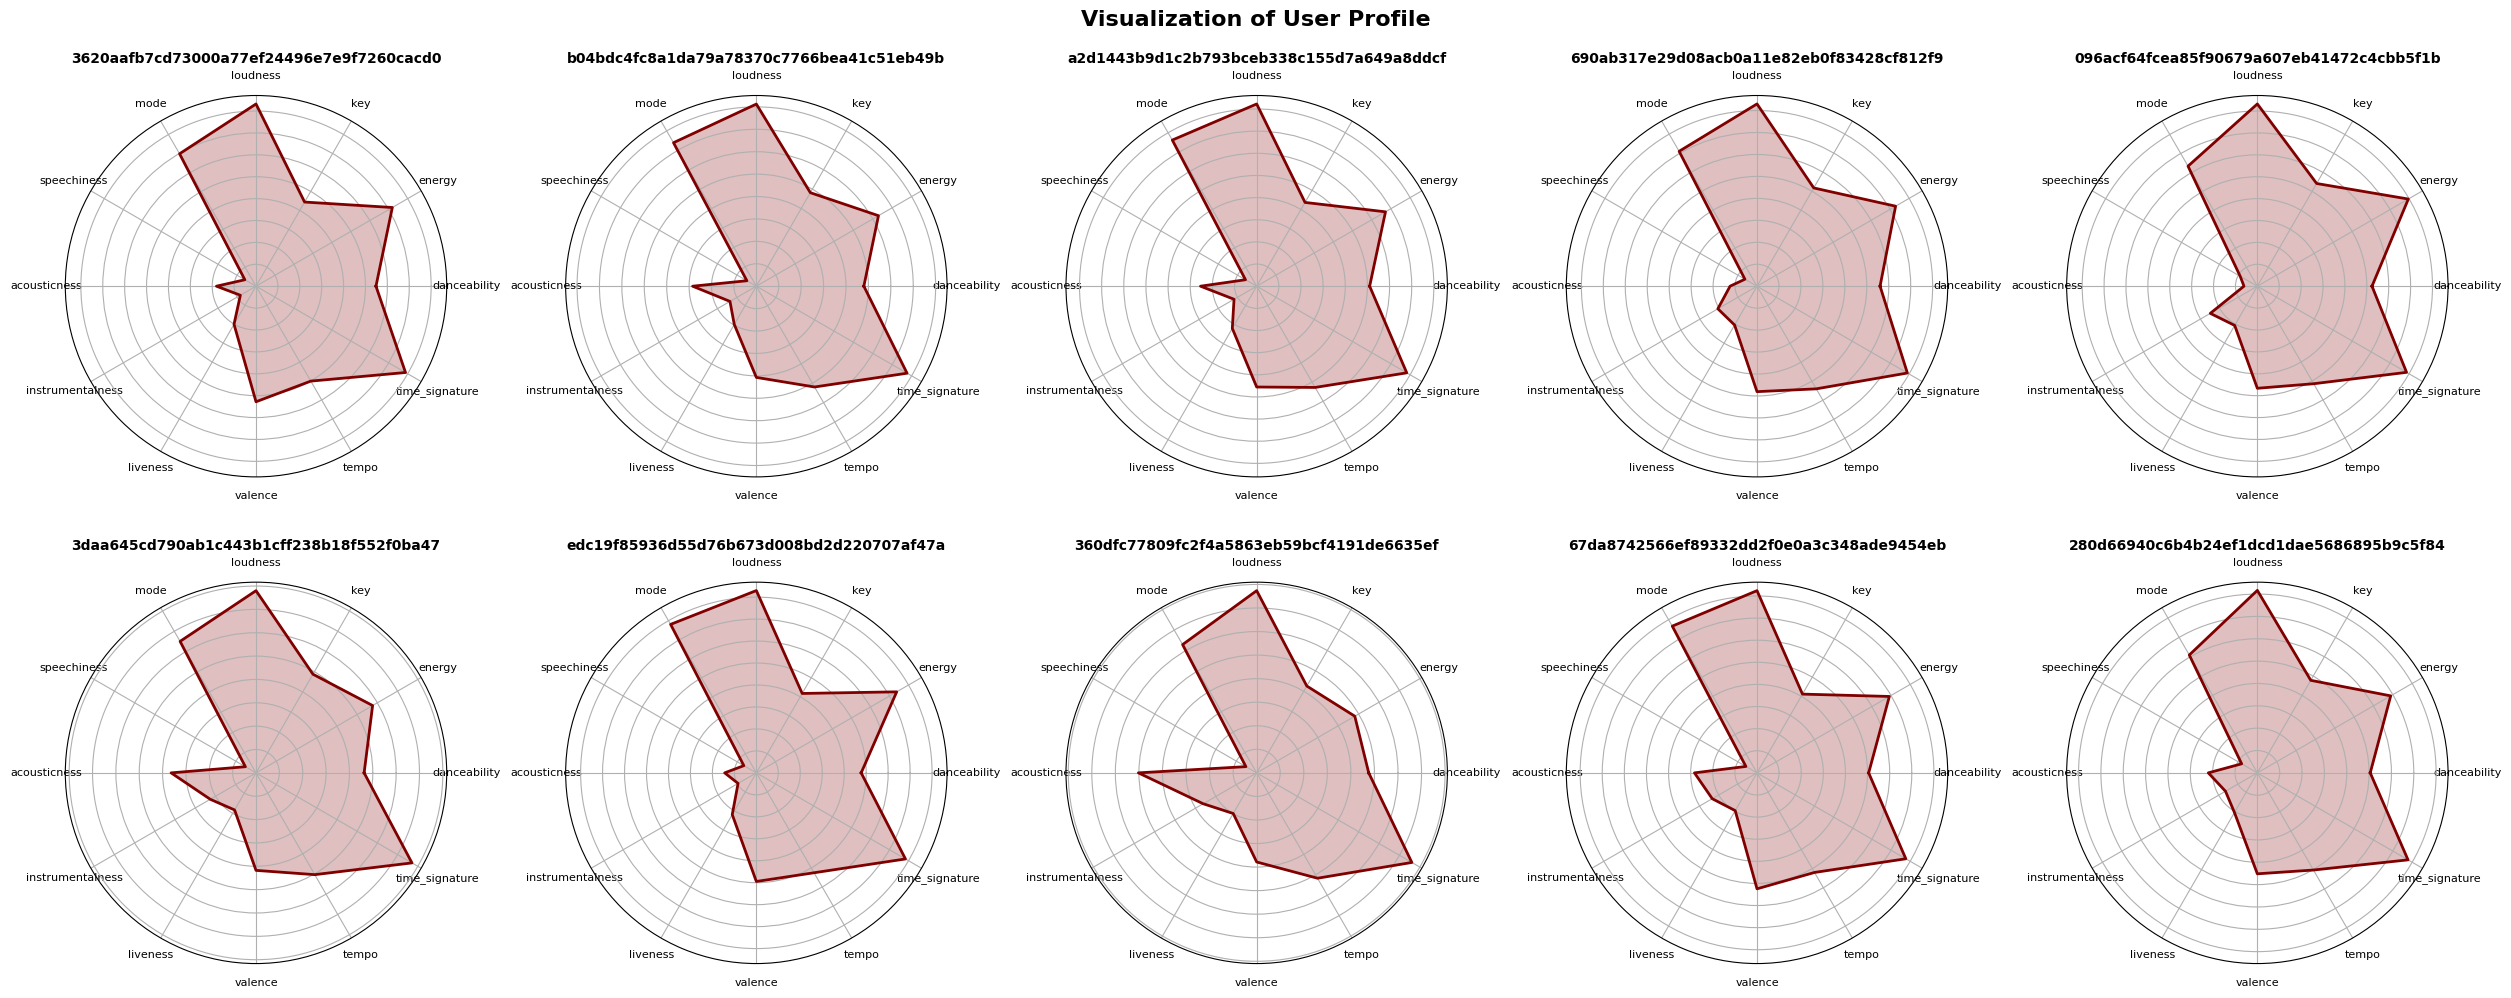

In [36]:
plot_user_tastes(users=df_user_profiles.sample(10), features=user_features[2:])

In [37]:
df_user_profiles.sample(5)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
a2758cfd225f99b0494d98b3e7c65920345f95c8,0.470660,0.746753,0.478067,0.823092,0.667832,0.077820,0.152148,0.133724,0.232886,0.447662,0.516870,0.779021
bbf1a709f0dfd2987e3769fb1a12df57b2780421,0.456722,0.751020,0.485275,0.841663,0.589537,0.072845,0.250982,0.160227,0.232550,0.411152,0.542049,0.783501
e3978effc77cab149cf60b7c1d587f2f17e2e1d4,0.550429,0.714809,0.473823,0.827900,0.674699,0.069971,0.178419,0.201380,0.202693,0.488269,0.524349,0.782169
0f32755844786210adb20174574df58853d4a673,0.517312,0.675955,0.480878,0.808113,0.645977,0.070312,0.212456,0.201191,0.205289,0.476179,0.524591,0.771494
97b430f6fe52008e9eafaa4563e2c9db31b0058a,0.435403,0.783611,0.491866,0.836808,0.621053,0.067527,0.136388,0.259372,0.256449,0.460144,0.525584,0.781053
